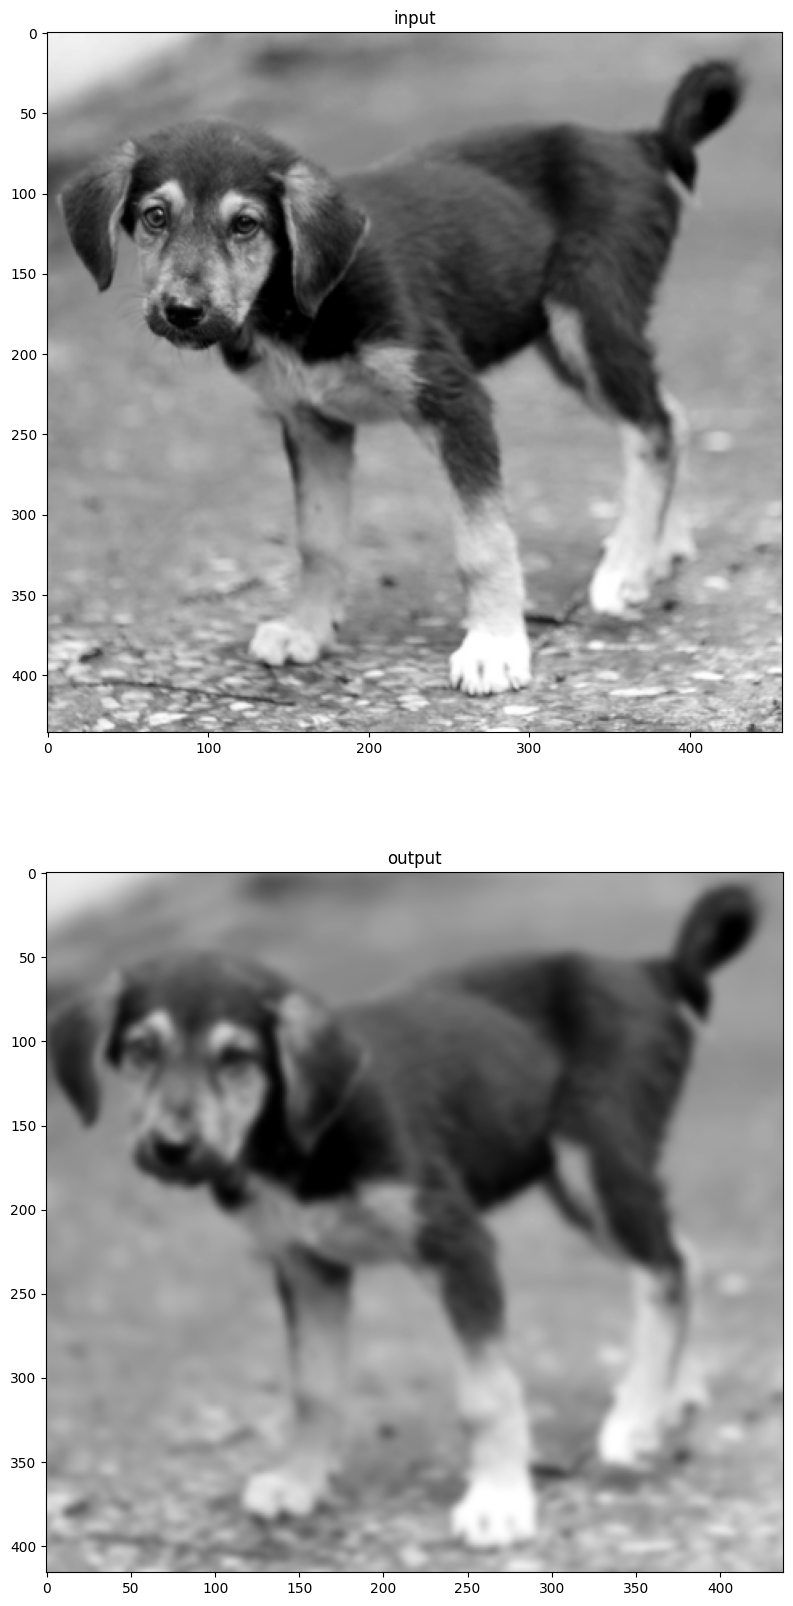

In [2]:
import numpy as np 
def matrix_sum(mat_1,mat_2):
    sum = 0
    for i in range(mat_1.shape[0]):
        for j in range(mat_1.shape[1]):
            sum = sum + mat_1[i][j] * mat_2[i][j]
    return sum
def filter_operation(image,kernel):
    #must use a odd size of filter
    kernel_center = (kernel.shape[0]-1)//2
    kernel_dimension = kernel.shape[0]
    image_height = image.shape[0]
    image_width = image.shape[1]
    out_image_height = int(image_height-kernel_dimension+1)
    out_image_width = int(image_width-kernel_dimension+1)
    out_image = np.zeros((out_image_height,out_image_width))
    for row in range(out_image_height):
        for column in range(out_image_width):
            mat = image[row:row+kernel_dimension,column:column+kernel_dimension]
            out_image[row,column] = matrix_sum(mat,kernel)/kernel_dimension/kernel_dimension
    return out_image
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
import cv2
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('input')
image = cv2.imread("d10.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")
filtered_image = image
for i in range(10): 
    filtered_image = filter_operation(filtered_image,kernel)
plt.subplot(2,1,2)
plt.title('output')
plt.imshow(filtered_image, cmap="gray")
plt.show()